In [1]:
#load data
import pickle as pkl
import pandas as pd
f1 = open('all_metrics_data_12h.pkl', 'rb')
label_data = pkl.load(f1)
f2 = open('related_metrics_12h.pkl', 'rb')
txn_failure_correlation = pkl.load(f2)
label_data

,time,label,txn_fail_num,CPU Busy,Sys Load (5m avg),Sys Load (15m avg),RAM Used,SWAP Used,CPU Cores,Uptime,...,"InErrs - Segments received in error (e.g., bad TCP checksums)",CurrEstab - TCP connections for which the current state is either ESTABLISHED or CLOSE- WAIT,SyncookiesFailed - Invalid SYN cookies received,SyncookiesRecv - SYN cookies received,SyncookiesSent - SYN cookies sent,ActiveOpens - TCP connections that have made a direct transition to the SYN-SENT state from the CLOSED state,PassiveOpens - TCP connections that have made a direct transition to the SYN-RCVD state from the LISTEN state,arp - Scrape duration,arp - Scrape success,{{collector}} - Scrape textfile error (1 = true)
0,2021-06-17 09:33:00,0,0.0,11.634746,35.25,36.50,1.761575e+09,0.0,4.0,1.347665e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000097,1.0,0.0
1,2021-06-17 09:33:15,0,0.0,13.043220,38.50,37.50,1.824432e+09,0.0,4.0,1.347667e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000083,1.0,0.0
2,2021-06-17 09:33:30,0,0.0,14.499153,40.75,38.25,1.876513e+09,0.0,4.0,1.347668e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.013587,1.0,0.0
3,2021-06-17 09:33:45,0,0.0,15.869492,45.25,39.75,1.886544e+09,0.0,4.0,1.347670e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000112,1.0,0.0
4,2021-06-17 09:34:00,0,0.0,16.991525,60.75,45.00,1.889354e+09,0.0,4.0,1.347671e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000108,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,2021-06-17 23:01:00,1,130.0,23.907627,85.25,144.25,2.379063e+09,0.0,4.0,1.352513e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000104,1.0,0.0
3233,2021-06-17 23:01:15,0,0.0,22.467797,82.75,142.50,2.384826e+09,0.0,4.0,1.352515e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000081,1.0,0.0
3234,2021-06-17 23:01:30,0,0.0,21.074576,78.50,140.25,2.390565e+09,0.0,4.0,1.352516e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000089,1.0,0.0
3235,2021-06-17 23:01:45,0,0.0,20.477119,75.25,138.00,2.391216e+09,0.0,4.0,1.352518e+07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000120,1.0,0.0


In [2]:
outlier_fraction = len(label_data[label_data['label'] == 1])/len(label_data)
outlier_fraction

0.28143342601173926

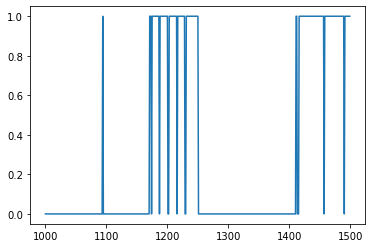

In [3]:
import matplotlib.pyplot as plt
plt.plot(label_data.label[1000:1500])
plt.show()

## Normalize

In [4]:
#normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(label_data.drop(['time'], axis=1)))
normalized_data.columns = label_data.columns[1:]
normalized_label_data = pd.merge(label_data.time, normalized_data, left_index=True, right_index=True, how='left')
normalized_label_data

,time,label,txn_fail_num,CPU Busy,Sys Load (5m avg),Sys Load (15m avg),RAM Used,SWAP Used,CPU Cores,Uptime,...,"InErrs - Segments received in error (e.g., bad TCP checksums)",CurrEstab - TCP connections for which the current state is either ESTABLISHED or CLOSE- WAIT,SyncookiesFailed - Invalid SYN cookies received,SyncookiesRecv - SYN cookies received,SyncookiesSent - SYN cookies sent,ActiveOpens - TCP connections that have made a direct transition to the SYN-SENT state from the CLOSED state,PassiveOpens - TCP connections that have made a direct transition to the SYN-RCVD state from the LISTEN state,arp - Scrape duration,arp - Scrape success,{{collector}} - Scrape textfile error (1 = true)
0,2021-06-17 09:33:00,0.0,0.978715,0.078088,0.078054,0.104827,0.266319,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000999,0.0,0.0
1,2021-06-17 09:33:15,0.0,0.978715,0.093869,0.085407,0.107843,0.288054,0.0,0.0,0.000309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000527,0.0,0.0
2,2021-06-17 09:33:30,0.0,0.978715,0.110182,0.090498,0.110106,0.306063,0.0,0.0,0.000618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437333,0.0,0.0
3,2021-06-17 09:33:45,0.0,0.978715,0.125535,0.100679,0.114630,0.309532,0.0,0.0,0.000927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001488,0.0,0.0
4,2021-06-17 09:34:00,0.0,0.978715,0.138107,0.135747,0.130468,0.310503,0.0,0.0,0.001236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001362,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,2021-06-17 23:01:00,1.0,0.981353,0.215597,0.191176,0.429864,0.479838,0.0,0.0,0.998764,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001213,0.0,0.0
3233,2021-06-17 23:01:15,0.0,0.978715,0.199464,0.185520,0.424585,0.481831,0.0,0.0,0.999073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000466,0.0,0.0
3234,2021-06-17 23:01:30,0.0,0.978715,0.183854,0.175905,0.417798,0.483815,0.0,0.0,0.999382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000734,0.0,0.0
3235,2021-06-17 23:01:45,0.0,0.978715,0.177160,0.168552,0.411011,0.484041,0.0,0.0,0.999691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001724,0.0,0.0


In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# all, cor, pca
data_feature = 'pca' 
if data_feature == 'all':
    related_label_data = normalized_label_data.drop(['time', 'label', 'txn_fail_num'], axis=1)
if data_feature == 'cor':
    related_metrics_name = txn_failure_correlation.index
    related_label_data = normalized_label_data[related_metrics_name]
if data_feature == 'pca':
    pca = PCA(n_components=15)
    related_label_data = pca.fit_transform(normalized_label_data.drop(['time', 'label', 'txn_fail_num'], axis=1))
    related_label_data = pd.DataFrame(related_label_data)
    print(pca.explained_variance_ratio_)
    print(sum(pca.explained_variance_ratio_))
    #print(pca.singular_values_)
related_label_data

[0.43761056 0.1772011  0.11945138 0.08040099 0.03011074 0.01819208
 0.01622525 0.01380875 0.01319932 0.0096791  0.00908628 0.00723748
 0.00675217 0.00605448 0.00503553]
0.9500451917720537


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.628476,-0.629605,2.652079,1.099140,1.614239,0.153452,1.368393,0.081433,0.224312,-0.088356,0.488829,0.571514,0.471959,-0.373287,0.276562
1,-0.514359,-0.683051,2.611074,1.078258,1.602711,0.152961,1.385539,0.089866,0.205290,-0.088692,0.487515,0.583960,0.465294,-0.339482,0.246304
2,-0.399568,-0.739660,2.566976,1.074209,1.616582,0.135461,1.421067,0.071215,0.204005,-0.020983,0.467460,0.559279,0.375970,-0.368401,0.182328
3,-0.295562,-0.772949,2.531558,1.017152,1.603817,0.119985,1.444848,0.116725,0.173576,-0.074489,0.477222,0.520183,0.303841,-0.328143,0.200624
4,-0.185498,-0.796569,2.492199,0.985679,1.610759,0.126438,1.419630,0.137401,0.154677,-0.094232,0.484262,0.519648,0.302803,-0.289664,0.190828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,-0.124648,-0.544708,0.606105,-1.065107,0.380935,0.489242,0.928312,-0.012139,-0.320115,0.306997,0.271049,0.244835,-0.286881,0.125805,-0.146564
3233,-0.258835,-0.491280,0.640420,-1.033738,0.350921,0.537932,0.938297,0.008353,-0.306705,0.285675,0.257749,0.257539,-0.283699,0.123406,-0.142815
3234,-0.347211,-0.456669,0.664849,-0.987720,0.345878,0.552619,0.925334,-0.023656,-0.290638,0.327190,0.255604,0.293105,-0.217773,0.099408,-0.144639
3235,-0.385334,-0.466455,0.665397,-0.975486,0.192788,0.554839,0.808182,-0.017850,-0.336697,0.316460,0.167267,0.180062,-0.221148,0.100560,-0.122088


## Base learner

In [6]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))
# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import metrics

In [7]:
def pred_labels(y_test, test_scores):
    fpr, tpr, thresholds = roc_curve(y_test, test_scores)
    cutoff = thresholds[np.argmax(tpr - fpr)]
    pred_label = []
    for each in test_scores:
        if each > cutoff:
            pred_label.append(1)
        else:
            pred_label.append(0)    
    return pred_label

In [8]:
labels_df = pd.DataFrame(normalized_label_data[normalized_label_data.columns[:3]]) 
X_train = related_label_data
y_train = labels_df['label']
X_test = related_label_data
y_test = labels_df['label']

In [9]:
def base_models():
    # Define nine outlier detection tools to be compared
    random_state = np.random.RandomState(42)

    #df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
    #              'ABOD', 'CBLOF', 'HBOS', 'IForest', 'KNN', 'LOF', 'MCD',
    #              'OCSVM']
    df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
                  'IForest', 'KNN', 'LOF', 'OCSVM']

    pr_df = pd.DataFrame(columns=df_columns)
    re_df = pd.DataFrame(columns=df_columns)
    f1_df = pd.DataFrame(columns=df_columns)
    roc_df = pd.DataFrame(columns=df_columns)
    train_time_df = pd.DataFrame(columns=df_columns)
    test_time_df = pd.DataFrame(columns=df_columns)
    label_df = pd.DataFrame(columns=df_columns[4:])

    outliers_fraction = np.count_nonzero(y_train) / len(y_train)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

    # construct containers for saving results
    pr_list = ['Monitor_data', X_train.shape[0], X_train.shape[1], outliers_percentage]
    re_list = ['Monitor_data', X_train.shape[0], X_train.shape[1], outliers_percentage]
    f1_list = ['Monitor_data', X_train.shape[0], X_train.shape[1], outliers_percentage]
    roc_list = ['Monitor_data', X_train.shape[0], X_train.shape[1], outliers_percentage]
    train_time_list = ['Monitor_data', X_train.shape[0], X_train.shape[1], outliers_percentage]
    test_time_list = ['Monitor_data', X_train.shape[0], X_train.shape[1], outliers_percentage]    
    label_list = []

    classifiers = {
        #'Angle-based Outlier Detector (ABOD)': ABOD(
        #    contamination=outliers_fraction),
        #    'Cluster-based Local Outlier Factor': CBLOF(
        #        contamination=outliers_fraction, check_estimator=False,
        #        random_state=random_state),
        #    'Histogram-base Outlier Detection (HBOS)': HBOS(
        #        contamination=outliers_fraction),
            'Isolation Forest': IForest(contamination=outliers_fraction,
                                        random_state=random_state),
            'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
            'Local Outlier Factor (LOF)': LOF(
                contamination=outliers_fraction),
        #   'Minimum Covariance Determinant (MCD)': MCD(
        #        contamination=outliers_fraction, random_state=random_state),
            'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
            #'Principal Component Analysis (PCA)': PCA(
            #    contamination=outliers_fraction, random_state=random_state),
        }

    for clf_name, clf in classifiers.items():
        t0 = time()
        clf.fit(X_train)
        t1 = time()
        test_scores = clf.decision_function(X_test)
        t2 = time()
        mean_score = np.nanmean(test_scores)
        test_scores[np.isnan(test_scores)] = mean_score
        train_duration = round(t1-t0, ndigits=4)
        test_duration = round(t2-t1, ndigits=4)
        train_time_list.append(train_duration)
        test_time_list.append(test_duration)
        #print(test_scores.tolist())
        pred_label = pred_labels(y_test, test_scores)   
#         print(pred_label)
#         print(y_test.tolist())
        pr = round(metrics.precision_score(y_test, pred_label, average='macro'), ndigits=4)
        re = round(metrics.recall_score(y_test, pred_label, average='macro'), ndigits=4)
        f1 = round(f1_score(y_test, pred_label, average='macro'), ndigits=4)
        roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
        print('{clf_name} ROC:{roc}, f1 score:{f1}, '
              'execution time: {duration}s'.format(clf_name=clf_name, roc=roc, f1=f1, duration=train_duration))

        pr_list.append(pr)
        re_list.append(re)
        f1_list.append(f1)
        roc_list.append(roc)
        label_list.append(pred_label)

    temp_df = pd.DataFrame(train_time_list).transpose()
    temp_df.columns = df_columns
    train_time_df = pd.concat([train_time_df, temp_df], axis=0)
    
    temp_df = pd.DataFrame(test_time_list).transpose()
    temp_df.columns = df_columns
    test_time_df = pd.concat([test_time_df, temp_df], axis=0)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(f1_list).transpose()
    temp_df.columns = df_columns
    f1_df = pd.concat([f1_df, temp_df], axis=0)

    temp_df = pd.DataFrame(label_list).transpose()
    temp_df.columns = df_columns[4:]
    label_df = pd.concat([label_df, temp_df], axis=0)

    temp_df = pd.DataFrame(pr_list).transpose()
    temp_df.columns = df_columns
    pr_df = pd.concat([pr_df, temp_df], axis=0)

    temp_df = pd.DataFrame(re_list).transpose()
    temp_df.columns = df_columns
    re_df = pd.concat([re_df, temp_df], axis=0)
    return train_time_df, test_time_df, pr_df, re_df, f1_df, roc_df

In [ ]:
df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
              'IForest', 'KNN', 'LOF', 'OCSVM']
t_pr_df = pd.DataFrame(columns=df_columns)
t_re_df = pd.DataFrame(columns=df_columns)
t_f1_df = pd.DataFrame(columns=df_columns)
t_roc_df = pd.DataFrame(columns=df_columns)
t_train_time_df = pd.DataFrame(columns=df_columns)
t_test_time_df = pd.DataFrame(columns=df_columns)

for i in range(10):
    train_time_e, test_time_e, pr_e, re_e, f1_e, roc_e = base_models()
    t_pr_df = pd.concat([t_pr_df, pr_e], axis=0, ignore_index=True)
    t_re_df = pd.concat([t_re_df, re_e], axis=0, ignore_index=True)
    t_f1_df = pd.concat([t_f1_df, f1_e], axis=0, ignore_index=True)
    t_roc_df = pd.concat([t_roc_df, roc_e], axis=0, ignore_index=True)
    t_train_time_df = pd.concat([t_train_time_df, train_time_e], axis=0, ignore_index=True)
    t_test_time_df = pd.concat([t_test_time_df, test_time_e], axis=0, ignore_index=True)

Isolation Forest ROC:0.8883, f1 score:0.8032, execution time: 0.3885s
K Nearest Neighbors (KNN) ROC:0.8583, f1 score:0.8043, execution time: 0.0258s
Local Outlier Factor (LOF) ROC:0.5287, f1 score:0.5143, execution time: 0.0492s
One-class SVM (OCSVM) ROC:0.7305, f1 score:0.737, execution time: 0.7653s
Isolation Forest ROC:0.8883, f1 score:0.8032, execution time: 0.3263s
K Nearest Neighbors (KNN) ROC:0.8583, f1 score:0.8043, execution time: 0.0257s
Local Outlier Factor (LOF) ROC:0.5287, f1 score:0.5143, execution time: 0.0463s
One-class SVM (OCSVM) ROC:0.7305, f1 score:0.737, execution time: 0.7337s
Isolation Forest ROC:0.8883, f1 score:0.8032, execution time: 0.3252s
K Nearest Neighbors (KNN) ROC:0.8583, f1 score:0.8043, execution time: 0.025s
Local Outlier Factor (LOF) ROC:0.5287, f1 score:0.5143, execution time: 0.0458s
One-class SVM (OCSVM) ROC:0.7305, f1 score:0.737, execution time: 0.7328s
Isolation Forest ROC:0.8883, f1 score:0.8032, execution time: 0.3286s
K Nearest Neighbors (K

In [ ]:
print('Train time complexity')
learner = ['IForest', 'KNN', 'LOF', 'OCSVM']
mean_train_time = []
std_train_time = []
for each in learner:
    mean_train_time.append(round(t_train_time_df[each].mean(), ndigits=4))
    std_train_time.append(round(t_train_time_df[each].std(), ndigits=4))
print(mean_train_time)
print(std_train_time)
t_train_time_df

In [ ]:
print('Test time complexity')
learner = ['IForest', 'KNN', 'LOF', 'OCSVM']
mean_test_time = []
std_test_time = []
for each in learner:
    mean_test_time.append(round(t_test_time_df[each].mean(), ndigits=4))
    std_test_time.append(round(t_test_time_df[each].std(), ndigits=4))
print(mean_test_time)
print(std_test_time)
t_test_time_df

In [ ]:
print('ROC Performance')
learner = ['IForest', 'KNN', 'LOF', 'OCSVM']
mean_roc = []
for each in learner:
    mean_roc.append(round(t_roc_df[each].mean(), ndigits=4))
print(mean_roc)
t_roc_df

In [ ]:
print('Precision')
learner = ['IForest', 'KNN', 'LOF', 'OCSVM']
mean_pr = []
for each in learner:
    mean_pr.append(round(t_pr_df[each].mean(), ndigits=4))
print(mean_pr)
t_pr_df

In [ ]:
print('Recall')
learner = ['IForest', 'KNN', 'LOF', 'OCSVM']
mean_re = []
for each in learner:
    mean_re.append(round(t_re_df[each].mean(), ndigits=4))
print(mean_re)
t_re_df

In [ ]:
print('F1 score')
learner = ['IForest', 'KNN', 'LOF', 'OCSVM']
mean_f1 = []
for each in learner:
    mean_f1.append(round(t_f1_df[each].mean(), ndigits=4))
print(mean_f1)
t_f1_df